## Machine Learning: Kaggle Competition Homework

Submitted by:
 - MARTINEZ, Kyle
 - FERNANDEZ, Chelsea 
 - DECULAWAN, Ryan
 - PPOSADAS, Annika
 - HAUSCHILD, Melanie


## Project Description 

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Practice Skills**
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting


**Goal**

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 


**Metric**

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Submission File Format**

The file should contain a header and have the following format:

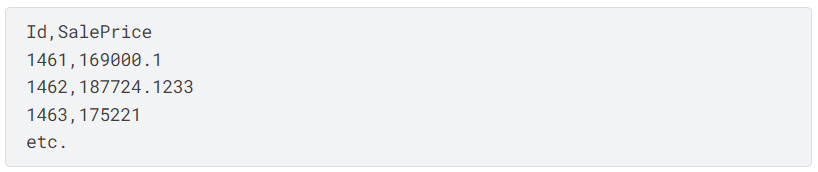

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Preprocessing
**TODO**
- What preprocessing techniques have you used and why?

In [2]:
train_csv_path = './data/train.csv'
test_csv_path = './data/test.csv'
train_df = pd.read_csv(train_csv_path, index_col='Id')
test_df = pd.read_csv(test_csv_path, index_col='Id')

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [6]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Handling Missing Values and Duplicate Values

In [7]:
# Check the count of duplicate rows in the dataset
train_df.duplicated().sum()

0

In [8]:
# Show a summary table for a single dataframe
def summarize_dataframe(df):
    summary = {
        'Column': [],
        'Data Type': [],
        'Null Count': [],
        'Unique Values': [],
        'Range': [],
        'Mean': [],
        'Standard Deviation': [],
    }

    for col in df.columns:
        summary['Column'].append(col)
        summary['Data Type'].append(df[col].dtype)
        summary['Null Count'].append(df[col].isnull().sum())
            
        # Show list of unique values if categorical
        if df[col].dtype.kind not in 'iufc':
            if df[col].dropna().nunique() < 20:
                # Show unique values by count (descending order)
                summary['Unique Values'].append(df[col].value_counts(dropna=True).index.tolist())
            else:
                summary['Unique Values'].append(None)
        else:
            summary['Unique Values'].append(None)

        if pd.api.types.is_numeric_dtype(df[col]):
            summary['Range'].append((df[col].min(), df[col].max()))
            summary['Mean'].append(round(df[col].mean(), 2))
            summary['Standard Deviation'].append(round(df[col].std(), 2))
        else:
            summary['Range'].append(None)
            summary['Mean'].append(None)
            summary['Standard Deviation'].append(None)

    summary_df = pd.DataFrame(summary)
    return summary_df

summarize_dataframe(train_df)

,Column,Data Type,Null Count,Unique Values,Range,Mean,Standard Deviation
0,MSSubClass,int64,0,None,"(20, 190)",56.90,42.30
1,MSZoning,object,0,"[RL, RM, FV, RH, C (all)]",None,NaN,NaN
2,LotFrontage,float64,259,None,"(21.0, 313.0)",70.05,24.28
3,LotArea,int64,0,None,"(1300, 215245)",10516.83,9981.26
4,Street,object,0,"[Pave, Grvl]",None,NaN,NaN
5,Alley,object,1369,"[Grvl, Pave]",None,NaN,NaN
6,LotShape,object,0,"[Reg, IR1, IR2, IR3]",None,NaN,NaN
7,LandContour,object,0,"[Lvl, Bnk, HLS, Low]",None,NaN,NaN
8,Utilities,object,0,"[AllPub, NoSeWa]",None,NaN,NaN
9,LotConfig,object,0,"[Inside, Corner, CulDSac, FR2, FR3]",None,NaN,NaN


In [9]:
# Handle missing values in each column

# 1. Handle LotFrontage
train_median_lotfrontage = train_df['LotFrontage'].median()
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_median_lotfrontage)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(train_median_lotfrontage)

# 2. Handle Alley
train_df['Alley'] = train_df['Alley'].fillna('None')
test_df['Alley'] = test_df['Alley'].fillna('None')

# 3. Handle MasVnrType and MasVnrArea
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')
train_df.loc[train_df['MasVnrType'] == 'None', 'MasVnrArea'] = 0
train_median_masvnarea = train_df['MasVnrArea'].median()
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_median_masvnarea)

test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')
test_df.loc[test_df['MasVnrType'] == 'None', 'MasVnrArea'] = 0
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(train_median_masvnarea)


# 4. Handle Basement Features
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cols:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

# 5. Handle Electrical
train_mode_electrical = train_df['Electrical'].mode()[0]
train_df['Electrical'] = train_df['Electrical'].fillna(train_mode_electrical)
test_df['Electrical'] = test_df['Electrical'].fillna(train_mode_electrical)

# 6. Handle FireplaceQu
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('None')

# 7. Handle Garage Features
garage_categorical = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_categorical:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')
train_df.loc[train_df['GarageType'] == 'None', 'GarageYrBlt'] = 0
test_df.loc[test_df['GarageType'] == 'None', 'GarageYrBlt'] = 0
train_median_garageyrblt = train_df['GarageYrBlt'].median()
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_median_garageyrblt)
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(train_median_garageyrblt)


# 8. Handle PoolQC
train_df['PoolQC'] = train_df['PoolQC'].fillna('None')
test_df['PoolQC'] = test_df['PoolQC'].fillna('None')

# 9. Handle Fence
train_df['Fence'] = train_df['Fence'].fillna('None')
test_df['Fence'] = test_df['Fence'].fillna('None')

# 10. Handle MiscFeature
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('None')

test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(train_df['BsmtFinSF1'].median())

test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(train_df['TotalBsmtSF'].median())

test_df['GarageCars'] = test_df['GarageCars'].fillna(train_df['GarageCars'].median())

test_df['GarageArea'] = test_df['GarageArea'].fillna(train_df['GarageArea'].median())

In [10]:
# Verify no missing values remain
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Series([], dtype: int64)


## Data Preparation

In [11]:
# Convert CentralAir to boolean
train_df['CentralAir'] = train_df['CentralAir'].map({
    'Y': True, 
    'N': False
})

In [12]:
# Convert CentralAir to boolean
test_df['CentralAir'] = test_df['CentralAir'].map({
    'Y': True, 
    'N': False
})

In [13]:
# Apply label encoding for all ordinal categorical values
ordinal_columns = [
    "LotShape",
    "LandContour",
    "Utilities",
    "LandSlope",
    "HouseStyle",
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence"
]

for col in ordinal_columns:
    test_df[col] = test_df[col].fillna('None')

for col in ordinal_columns:
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(train_df[col].values.reshape(-1, 1))
    train_df[col] = oe.fit_transform(train_df[col].values.reshape(-1, 1))
    test_df[col] = oe.transform(test_df[col].values.reshape(-1, 1))


In [14]:
# Apply one-hot encoding for all nominal categorical values
nominal_columns = [
    "MSSubClass",
    "MSZoning",
    "Alley",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Heating",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
    "Street",
    "BldgType",
    "Foundation",
    "GarageType"
]

train_df = pd.get_dummies(train_df, columns=nominal_columns, drop_first=True)
test_df = pd.get_dummies(test_df, columns=nominal_columns, drop_first=True)

In [15]:
# Scale values (not sure with this)
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('SalePrice')  # Exclude target variable for now


In [16]:
# Select columns that have a Pearson correlation with the target value above a specified threshold.
threshold = 0.3
train_df_corr = train_df.corr()
corr = abs(train_df_corr['SalePrice'])

selected_features_corr = corr[corr > threshold]
selected_features_corr = selected_features_corr.drop('SalePrice')

print("Total features:", len(selected_features_corr))
selected_features_corr.sort_values(ascending=False)

selected_features = selected_features_corr.index.tolist()
filtered_train_df = train_df[selected_features].copy()
filtered_test_df = test_df[selected_features].copy()



Total features: 36


## Exploratory Data Analysis

**TODO**
- What's the data? Show stats, graphs, etc.
- Is there some pattern?

#### Insights

The top 20 features correlated with SalePrice reveal several key insights into the factors influencing house prices. Notably, OverallQual has the highest correlation (0.79), indicating that the overall quality of the home significantly affects its value; higher-quality finishes and construction materials tend to attract higher prices. Similarly, GrLivArea (0.71) suggests that larger living areas are associated with higher sale prices, emphasizing the importance of space in home valuation.

GarageCars and GarageArea (0.64 and 0.62, respectively) indicate that properties with more garage space and capacity are more desirable, likely reflecting buyer preferences for convenience and functionality. The strong correlation of TotalBsmtSF (0.61) and 1stFlrSF (0.61) highlights the significance of basement and first-floor areas, suggesting that homes with larger usable spaces tend to command higher prices.

The FullBath feature (0.56) further supports the idea that more bathrooms enhance property value, while TotRmsAbvGrd (0.53) implies that homes with more rooms are more appealing to buyers. Features such as YearBuilt (0.52) and YearRemodAdd (0.51) point to the age and modernization of the home as influential factors, with newer or recently renovated homes being more sought after.

Other features like MasVnrArea (0.47) and Fireplaces (0.47) suggest that aesthetic and luxury features can also contribute positively to sale prices. The presence of a fireplace or a significant masonry veneer adds to a home’s charm and appeal.

Lastly, LotFrontage (0.35) and WoodDeckSF (0.32) reflect the importance of outdoor space and landscaping, which can enhance the overall desirability of a property. Understanding these correlations can help in feature selection for predictive modeling, guiding renovations or improvements that could lead to higher property valuations, and informing potential buyers about key attributes to consider when searching for a home.

#### Feature Importance (Not sure with this one yet)

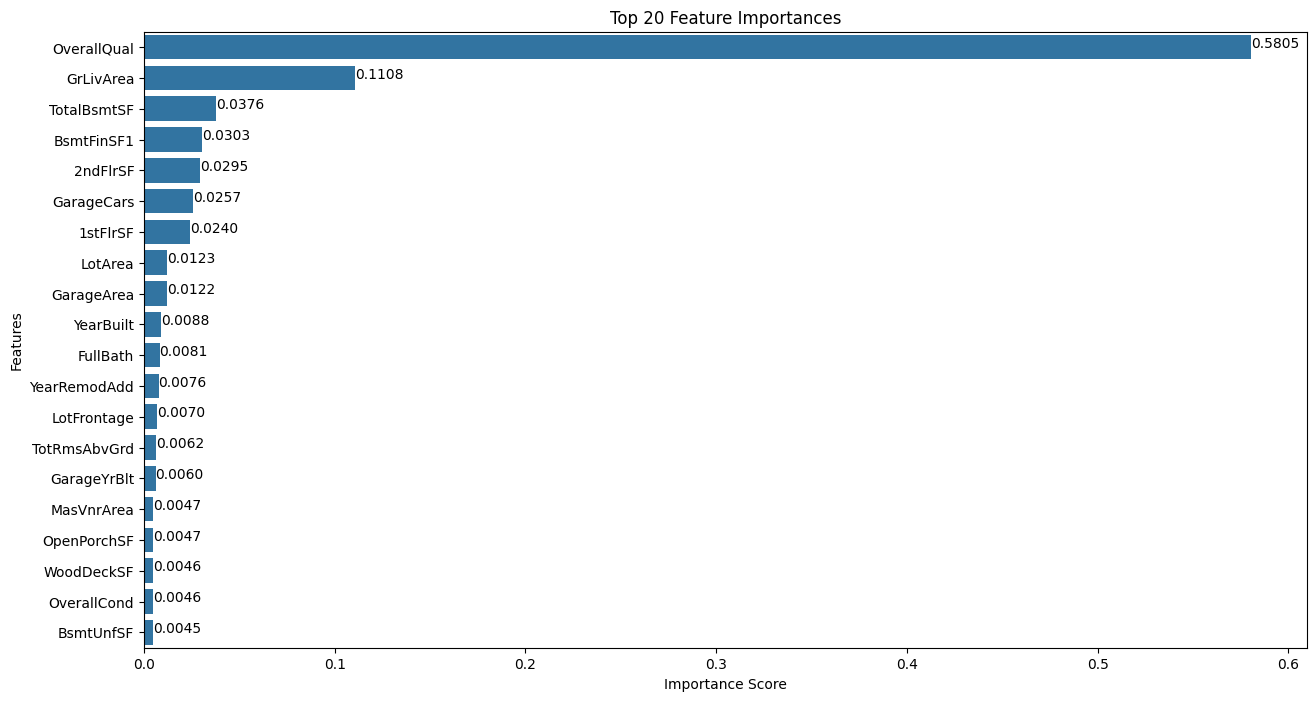

Top 20 features by importance:
OverallQual     0.580510
GrLivArea       0.110790
TotalBsmtSF     0.037596
BsmtFinSF1      0.030261
2ndFlrSF        0.029544
GarageCars      0.025652
1stFlrSF        0.024002
LotArea         0.012287
GarageArea      0.012193
YearBuilt       0.008805
FullBath        0.008129
YearRemodAdd    0.007621
LotFrontage     0.006950
TotRmsAbvGrd    0.006206
GarageYrBlt     0.006033
MasVnrArea      0.004694
OpenPorchSF     0.004668
WoodDeckSF      0.004630
OverallCond     0.004556
BsmtUnfSF       0.004518
dtype: float64


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(15, 8))
sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Annotate bars with the actual importance scores
for index, value in enumerate(feature_importances[:20]):
    plt.text(value, index, f'{value:.4f}')  # Print the value formatted to 4 decimal places

plt.show()

print("Top 20 features by importance:")
print(feature_importances[:20])

## ML Model: SVR

**TODO**
- Light discussion on the models used.
- What biases/assumptions do the algorithms/models have?
- Explain why certain models were used.

In [18]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [19]:
X_train = filtered_train_df.copy()
y_train = train_df['SalePrice'].copy()
X_test = filtered_test_df.copy()

In [20]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:

svr_base = SVR(kernel = 'linear')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svr_base.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [22]:
svr_base_train_pred = svr_base.predict(X_train_scaled)
svr_base_train_metrics = {
    'RMSE': root_mean_squared_error(y_train, svr_base_train_pred),
    'MAE': mean_absolute_error(y_train, svr_base_train_pred),
    'R2': r2_score(y_train, svr_base_train_pred)
}

svr_base_test_pred = svr_base.predict(X_test)

svr_base_train_df = pd.DataFrame(svr_base_train_metrics, index=['Train'])

print("Base Support Vector Regressor Performance:")
print(svr_base_train_df)

Base Support Vector Regressor Performance:
              RMSE          MAE        R2
Train  71809.99271  47142.96962  0.182361


c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [23]:
svr_base_predictions = svr_base.predict(X_test)
svr_base_predictions

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([5596915.40907897, 6483642.88178979, 6567949.6416948 , ...,
       6570833.23769838, 5203153.85911086, 7231504.92060401])

In [24]:
base_output_df = test_df.copy()
base_output_df['SalePrice'] = svr_base_predictions
base_output_df = base_output_df[['SalePrice']]
base_output_df.to_csv('base_predicted_house_prices.csv', index=True)

In [25]:
param_grid_linear = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 5, 10, 20], 'epsilon': [0.01, 0.1, 0.5, 1.0]}
grid_linear = GridSearchCV(SVR(kernel='linear'), param_grid_linear, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_linear.fit(X_train_scaled, y_train)
best_params_linear = grid_linear.best_params_
best_score_linear = grid_linear.best_score_

In [26]:
param_grid_poly = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 5, 10, 20], 'degree': [1, 3, 5, 10, 20], 'epsilon': [0.01, 0.1, 0.5, 1.0]}
grid_poly = GridSearchCV(SVR(kernel='poly'), param_grid_poly, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_poly.fit(X_train_scaled, y_train)
best_params_poly = grid_poly.best_params_
best_score_poly = grid_poly.best_score_

In [27]:
param_grid_rbf = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 5, 10, 20], 'gamma': ['scale', 'auto', 1000, 10, 5, 2.5, 1.5, 1.0], 'epsilon': [0.01, 0.1, 0.5, 1.0]}
grid_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid_rbf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_rbf.fit(X_train_scaled, y_train)
best_params_rbf = grid_rbf.best_params_
best_score_rbf = grid_rbf.best_score_

In [28]:
best_kernel = min([(best_score_linear, 'linear'), (best_score_poly, 'poly'), (best_score_rbf, 'rbf')])
best_params = {
    'linear': best_params_linear,
    'poly': best_params_poly,
    'rbf': best_params_rbf
}

best_params[best_kernel[1]]

{'C': 20, 'epsilon': 0.01, 'gamma': 'auto'}

In [29]:
svr_tuned = SVR(**best_params[best_kernel[1]])
svr_tuned.fit(X_train_scaled, y_train)

SVR(C=20, epsilon=0.01, gamma='auto')

In [30]:
svr_tuned_train_pred = svr_tuned.predict(X_train_scaled)
svr_tuned_train_metrics = {
    'RMSE': root_mean_squared_error(y_train, svr_tuned_train_pred),
    'MAE': mean_absolute_error(y_train, svr_tuned_train_pred),
    'R2': r2_score(y_train, svr_tuned_train_pred)
}


svr_tuned_train_df = pd.DataFrame(svr_tuned_train_metrics, index=['Train'])

print("Tuned Support Vector Regressor Performance:")
print(svr_tuned_train_df)

Tuned Support Vector Regressor Performance:
               RMSE           MAE        R2
Train  80136.721903  53936.716999 -0.018251


In [31]:
svr_tuned_predictions = svr_tuned.predict(X_test)
svr_tuned_predictions

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([164011.49393953, 164011.49393953, 164011.49393953, ...,
       164011.49393953, 164011.49393953, 164011.49393953])

In [32]:
output_df = test_df.copy()
output_df['SalePrice'] = svr_tuned_predictions
output_df = output_df[['SalePrice']]
output_df.to_csv('predicted_house_prices.csv', index=True)

## Results
**TODO**
- Explain why certain metrics were used to evaluate the models.
- Was there anything surprising about the results? Check the scores.
- What is the impact of the preprocessing that you have done on the results of the model?

## Writeup
1. What were the challenges you encountered while implementing it?
2. Any other learnings?